In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [227]:
data = pd.read_csv("tennis.csv")

In [228]:
data

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [229]:
data.describe()

,temperature,humidity
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


C:\Users\OZAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity', ylabel='count'>

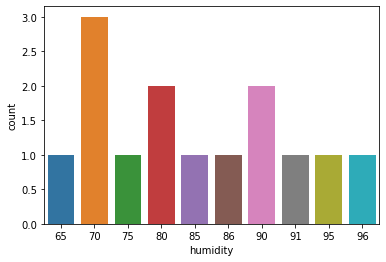

In [230]:
sbn.countplot(data["humidity"])

In [231]:
data

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [232]:
from sklearn.preprocessing import LabelEncoder

In [233]:
data2 = data.apply(LabelEncoder().fit_transform)

In [234]:
data2

,outlook,temperature,humidity,windy,play
0,2,11,4,0,0
1,2,8,6,1,0
2,0,10,5,0,1
3,1,4,9,0,1
4,1,2,3,0,1
5,1,1,1,1,0
6,0,0,0,1,1
7,2,6,8,0,0
8,2,3,1,0,1
9,1,7,3,0,1


In [235]:
hs = data2.iloc[:,:1]

In [236]:
hs

,outlook
0,2
1,2
2,0
3,1
4,1
5,1
6,0
7,2
8,2
9,1


In [237]:
from sklearn.preprocessing import OneHotEncoder

In [238]:
ohe = OneHotEncoder()

In [239]:
hs = ohe.fit_transform(hs).toarray()

In [240]:
hs


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [241]:
weather = pd.DataFrame(data = hs, index = range(14), columns = ["o","r","s"])

In [242]:
latestData = pd.concat([weather, data.iloc[:,1:3]], axis = 1)

In [243]:
latestData

,o,r,s,temperature,humidity
0,0.0,0.0,1.0,85,85
1,0.0,0.0,1.0,80,90
2,1.0,0.0,0.0,83,86
3,0.0,1.0,0.0,70,96
4,0.0,1.0,0.0,68,80
5,0.0,1.0,0.0,65,70
6,1.0,0.0,0.0,64,65
7,0.0,0.0,1.0,72,95
8,0.0,0.0,1.0,69,70
9,0.0,1.0,0.0,75,80


In [244]:
latestData = pd.concat([data2.iloc[:,-2:], latestData], axis = 1)

In [245]:
latestData

,windy,play,o,r,s,temperature,humidity
0,0,0,0.0,0.0,1.0,85,85
1,1,0,0.0,0.0,1.0,80,90
2,0,1,1.0,0.0,0.0,83,86
3,0,1,0.0,1.0,0.0,70,96
4,0,1,0.0,1.0,0.0,68,80
5,1,0,0.0,1.0,0.0,65,70
6,1,1,1.0,0.0,0.0,64,65
7,0,0,0.0,0.0,1.0,72,95
8,0,1,0.0,0.0,1.0,69,70
9,0,1,0.0,1.0,0.0,75,80


In [246]:
from sklearn.model_selection import train_test_split

In [247]:
z = x_train, x_test, y_train, y_test = train_test_split(latestData.iloc[:,:-1], latestData.iloc[:,1:], test_size=0.33, random_state=100)

In [248]:
x_train

,windy,play,o,r,s,temperature
4,0,1,0.0,1.0,0.0,68
6,1,1,1.0,0.0,0.0,64
2,0,1,1.0,0.0,0.0,83
0,0,0,0.0,0.0,1.0,85
10,1,1,0.0,0.0,1.0,75
7,0,0,0.0,0.0,1.0,72
3,0,1,0.0,1.0,0.0,70
13,1,0,0.0,1.0,0.0,71
8,0,1,0.0,0.0,1.0,69


In [249]:
x_test

,windy,play,o,r,s,temperature
11,1,1,1.0,0.0,0.0,72
12,0,1,1.0,0.0,0.0,81
5,1,0,0.0,1.0,0.0,65
1,1,0,0.0,0.0,1.0,80
9,0,1,0.0,1.0,0.0,75


In [250]:
y_train

,play,o,r,s,temperature,humidity
4,1,0.0,1.0,0.0,68,80
6,1,1.0,0.0,0.0,64,65
2,1,1.0,0.0,0.0,83,86
0,0,0.0,0.0,1.0,85,85
10,1,0.0,0.0,1.0,75,70
7,0,0.0,0.0,1.0,72,95
3,1,0.0,1.0,0.0,70,96
13,0,0.0,1.0,0.0,71,91
8,1,0.0,0.0,1.0,69,70


In [251]:
y_test

,play,o,r,s,temperature,humidity
11,1,1.0,0.0,0.0,72,90
12,1,1.0,0.0,0.0,81,75
5,0,0.0,1.0,0.0,65,70
1,0,0.0,0.0,1.0,80,90
9,1,0.0,1.0,0.0,75,80


In [252]:
from sklearn.linear_model import LinearRegression

In [253]:
regressor = LinearRegression()

In [254]:
regressor.fit(x_train,y_train)

LinearRegression()

In [255]:
y_pred = regressor.predict(x_test)

In [256]:
y_pred.shape

(5, 6)

In [257]:
y_pr = y_pred.astype("int")

In [258]:
y_pr

array([[ 1,  0,  0,  0, 72, 70],
       [ 1,  0,  0,  0, 81, 82],
       [ 0,  0,  0,  0, 65, 89],
       [ 0,  0,  0,  0, 80, 80],
       [ 1,  0,  0,  0, 75, 89]])

In [259]:
y_ts = y_test.astype("int")

In [260]:
y_ts.iloc[:,-1:]

,humidity
11,90
12,75
5,70
1,90
9,80


'humidity' değerlerimizi sırasıyla : 70, 82, 89, 80, 89 olarak tahmin etti. y_test sonuçlarımız ise yukarıdaki gibidir.

In [261]:
import statsmodels.api as sm

In [262]:
X = np.append(arr=np.ones((14,1)).astype(int), values = latestData.iloc[:,:-1], axis = 1)

In [263]:
X

array([[ 1.,  0.,  0.,  0.,  0.,  1., 85.],
       [ 1.,  1.,  0.,  0.,  0.,  1., 80.],
       [ 1.,  0.,  1.,  1.,  0.,  0., 83.],
       [ 1.,  0.,  1.,  0.,  1.,  0., 70.],
       [ 1.,  0.,  1.,  0.,  1.,  0., 68.],
       [ 1.,  1.,  0.,  0.,  1.,  0., 65.],
       [ 1.,  1.,  1.,  1.,  0.,  0., 64.],
       [ 1.,  0.,  0.,  0.,  0.,  1., 72.],
       [ 1.,  0.,  1.,  0.,  0.,  1., 69.],
       [ 1.,  0.,  1.,  0.,  1.,  0., 75.],
       [ 1.,  1.,  1.,  0.,  0.,  1., 75.],
       [ 1.,  1.,  1.,  1.,  0.,  0., 72.],
       [ 1.,  0.,  1.,  1.,  0.,  0., 81.],
       [ 1.,  1.,  0.,  0.,  1.,  0., 71.]])

In [264]:
X_l = latestData.iloc[:,[0,1,2,3,4,5]].values

In [265]:
X_l

array([[ 0.,  0.,  0.,  0.,  1., 85.],
       [ 1.,  0.,  0.,  0.,  1., 80.],
       [ 0.,  1.,  1.,  0.,  0., 83.],
       [ 0.,  1.,  0.,  1.,  0., 70.],
       [ 0.,  1.,  0.,  1.,  0., 68.],
       [ 1.,  0.,  0.,  1.,  0., 65.],
       [ 1.,  1.,  1.,  0.,  0., 64.],
       [ 0.,  0.,  0.,  0.,  1., 72.],
       [ 0.,  1.,  0.,  0.,  1., 69.],
       [ 0.,  1.,  0.,  1.,  0., 75.],
       [ 1.,  1.,  0.,  0.,  1., 75.],
       [ 1.,  1.,  1.,  0.,  0., 72.],
       [ 0.,  1.,  1.,  0.,  0., 81.],
       [ 1.,  0.,  0.,  1.,  0., 71.]])

In [266]:
X_l = np.array(X_l,dtype=float)

In [267]:
model = sm.OLS(latestData.iloc[:,-1:],X_l).fit()

In [268]:
model.summary()

C:\Users\OZAN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.6653
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.661
Time:                        14:49:59   Log-Likelihood:                -49.542
No. Observations:                  14   AIC:                             111.1
Df Residuals:                       8   BIC:                             114.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.0286      7.229     -0.557      0.593     -20.698      12.641
x2            -8.2778      8.029     -1.031      0.333     -26.793      10.237
x3            52.3891     50.214      1.043      0.327     -63.404     168.183
x4            55.6337     45.233      1.230      0.254     -48.673     159.940
x5            49.4291     48.337      1.023      0.336     -62.035     160.893
x6             0.4920      0.597      0.825      0.433      -0.884       1.868
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.823
Skew:                           0.389   Prob(JB):                        0.663
Kurtosis:                       2.103   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

x1 değerinin modelimizi en fazla olumsuz etkileyen değer olduğunu görüyoruz. Bundan dolayı x1 değerini atacağım. (Eleme metodunu (backward elimination) kullanacağım.) 

In [269]:
latestData1 = latestData.iloc[:,1:]

In [270]:
import statsmodels.api as sm

In [271]:
X = np.append(arr=np.ones((14,1)).astype(int), values = latestData1.iloc[:,:-1], axis = 1)

In [272]:
X_l = latestData1.iloc[:,[0,1,2,3,4]].values

In [273]:
X_l = np.array(X_l,dtype=float)

In [274]:
model = sm.OLS(latestData1.iloc[:,-1:],X_l).fit()

In [275]:
model.summary()

C:\Users\OZAN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8165
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.546
Time:                        14:50:00   Log-Likelihood:                -49.809
No. Observations:                  14   AIC:                             109.6
Df Residuals:                       9   BIC:                             112.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.2865      6.909     -0.910      0.387     -21.916       9.343
x2            36.6564     39.905      0.919      0.382     -53.615     126.927
x3            41.9135     36.464      1.149      0.280     -40.573     124.400
x4            35.1064     39.339      0.892      0.395     -53.884     124.097
x5             0.6484      0.506      1.282      0.232      -0.496       1.793
==============================================================================
Omnibus:                        0.887   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.810
Skew:                           0.424   Prob(JB):                        0.667
Kurtosis:                       2.181   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [276]:
x_train = x_train.iloc[:,1:]

In [277]:
x_test = x_test.iloc[:,1:]

In [278]:
regressor.fit(x_train,y_train)

LinearRegression()

In [279]:
y_pred = regressor.predict(x_test)

In [280]:
y_pred.astype("int")

array([[ 0,  0,  0,  0, 72, 74],
       [ 0,  0,  0,  0, 81, 80],
       [ 0,  0,  1,  0, 65, 92],
       [ 0,  0,  0,  1, 80, 88],
       [ 1,  0,  0,  0, 75, 88]])

In [281]:
y_test.iloc[:,-1:]

,humidity
11,90
12,75
5,70
1,90
9,80


Eski "humidity" tahminlerimiz "70, 82, 89, 80, 89" olarak çıkmıştı.
Yeni "humidity" tahminlerimiz ise "74, 80, 92, 88, 88" olarak meydana geldi. Burada modelimizi en çok olumsuz yönde etkileyen değişkeni atmamız, tahmin değerlerimizi biraz daha gerçek değerlere yakınlaştırdı. Tabi eğer istersek; bu değerleri eleme metodunu kullanarak gerçek değerlere daha fazla yaklaştırabiliriz.

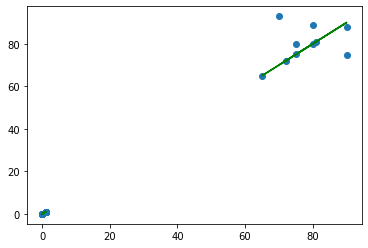

In [282]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "g-")

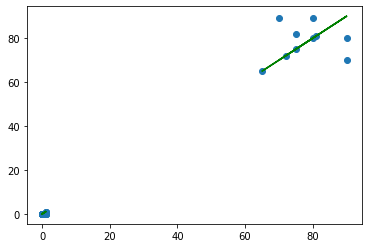

In [283]:
plt.scatter(y_test, y_pr)
plt.plot(y_test, y_test, "g-")